# Data Preprocessing and Early Data Analysis (EDA):
a. https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
From the link load the dataset, handle missing values, and visualize key features.

b. Apply feature scaling and one-hot encoding

c. Comment and provide explanation of each method or function used in the *code*

In [89]:
import sys, os, tarfile, urllib.request
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Visualization Dependencies
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
ID = "Boston Housing"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", ID)
if not os.path.isdir(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignoring the Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal")
import IPython

The link doesnt work :') beause Boston dataset was removed from SK learn bc of ethial issues

In [32]:
# Data URL for Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Reading the raw dataset and skipping the first 22 rows to get data
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Preparing the data by splitting values
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Converting to a DataFrame
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
housing = pd.DataFrame(data, columns=columns)

# Adding target as the price column
housing['PRICE'] = target

# Inspecting the first 7 rows
housing.head(7)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Saving Figure Boston_Histogram_Plots


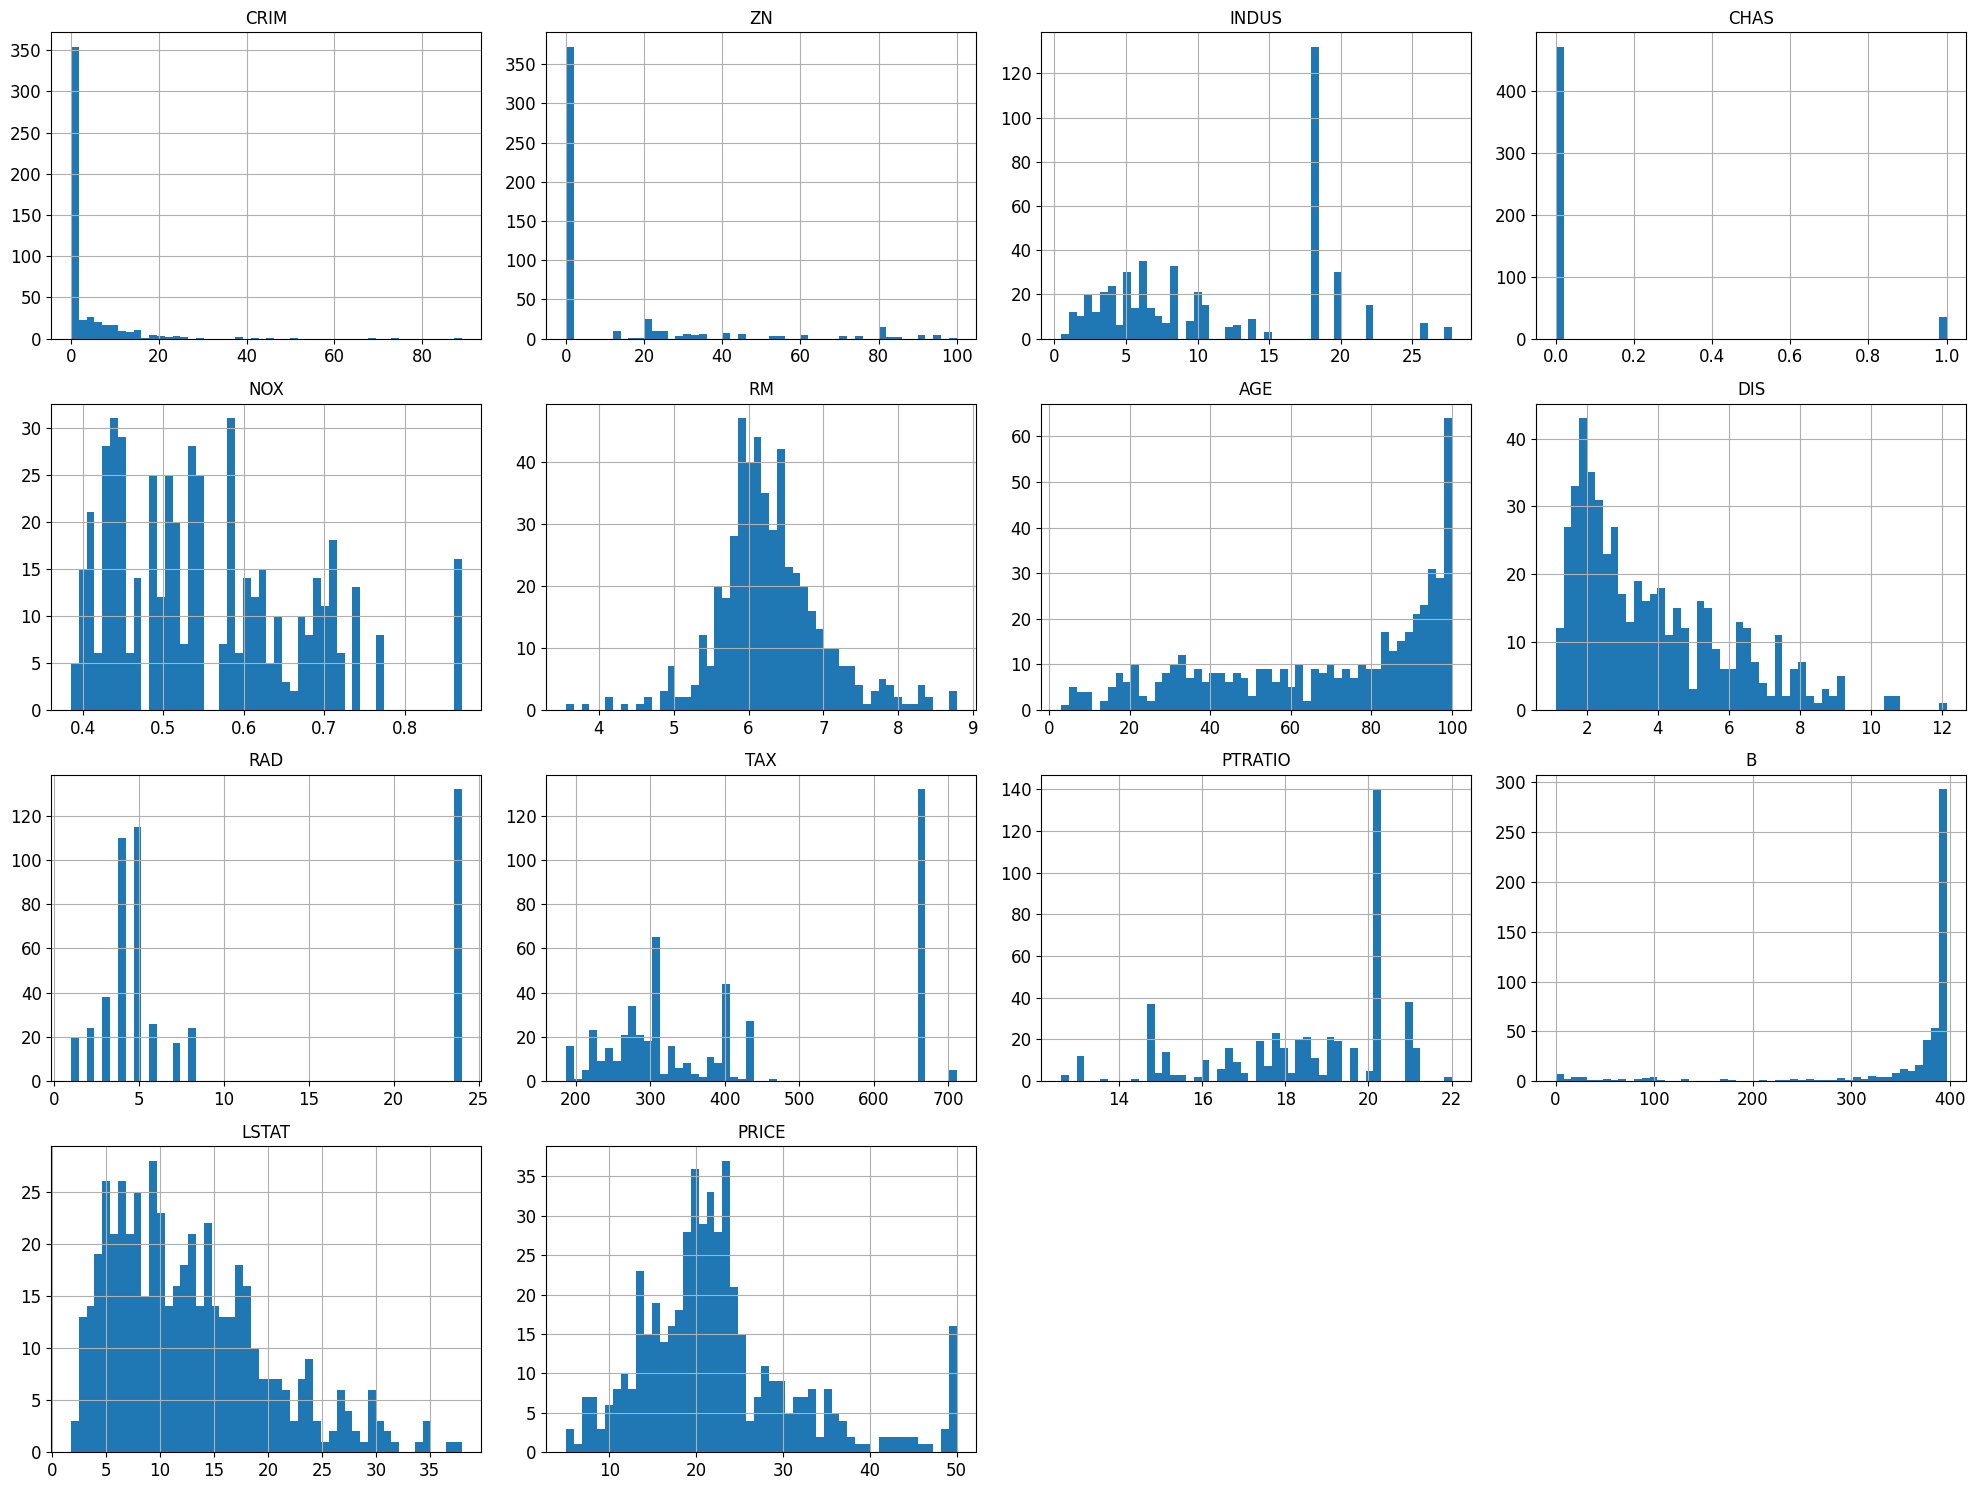

In [34]:
# Commented out IPython magic to ensure Python compatibility.
# Inspecting the Data using Histograms for Boston Housing dataset
# %matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'housing' is the DataFrame holding the Boston dataset
housing.hist(bins=50, figsize=(20, 15))
save_fig("Boston_Histogram_Plots")
plt.show()


In [35]:
# Splitting the Dataset for Boston Housing
from sklearn.model_selection import train_test_split

# Assuming 'housing' is the DataFrame holding the Boston dataset
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=11)

# Inspecting the Dataset
print(f"Training set: {len(train_set)}")                                             # Number of Training Dataset.
print(f"\nTesting set: {len(test_set)}")                                             # Number of Testing Dataset.
IPython.display.display(train_set.head(3))  # Displaying first 3 rows of training set
print("\n")
IPython.display.display(test_set.head(3))  # Displaying first 3 rows of testing set

Training set: 404

Testing set: 102


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
188,0.12579,45.0,3.44,0.0,0.437,6.556,29.1,4.5667,5.0,398.0,15.2,382.84,4.56,29.8
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73,21.0
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,19.6


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,23.4
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,22.0


In [36]:
print(housing.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


income_cat
2    157
3    125
4     88
5     74
1     62
Name: count, dtype: int64




<Axes: >

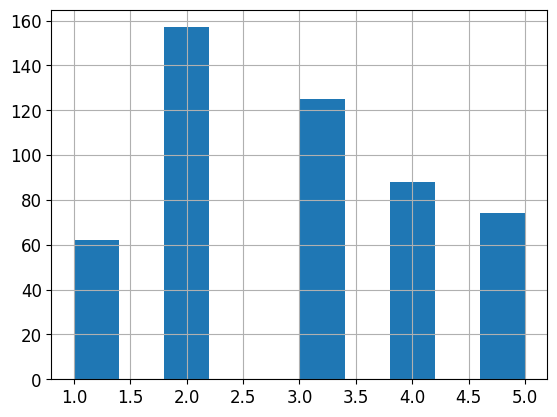

In [37]:
# Creating the Income Categories based on LSTAT (percentage of lower status population)
housing["income_cat"] = pd.cut(housing["LSTAT"],
                               bins=[0., 5, 10, 15, 20, np.inf],
                               labels=[1, 2, 3, 4, 5])

# Inspecting the Income Categories
print(housing["income_cat"].value_counts())
print("\n")
housing["income_cat"].hist()

income_cat
2    157
3    125
4     88
5     74
1     62
Name: count, dtype: int64


income_cat
2    0.313725
3    0.245098
4    0.176471
5    0.147059
1    0.117647
Name: count, dtype: float64


income_cat
2    0.310277
3    0.247036
4    0.173913
5    0.146245
1    0.122530
Name: count, dtype: float64




,Overall,Stratified,Random,Random % Error,Stratified % Error
income_cat,,,,,
1,0.122530,0.117647,0.107843,-11.986085,-3.984820
2,0.310277,0.313725,0.333333,7.430998,1.111527
3,0.247036,0.245098,0.186275,-24.596078,-0.784314
4,0.173913,0.176471,0.176471,1.470588,1.470588
5,0.146245,0.147059,0.196078,34.075252,0.556439


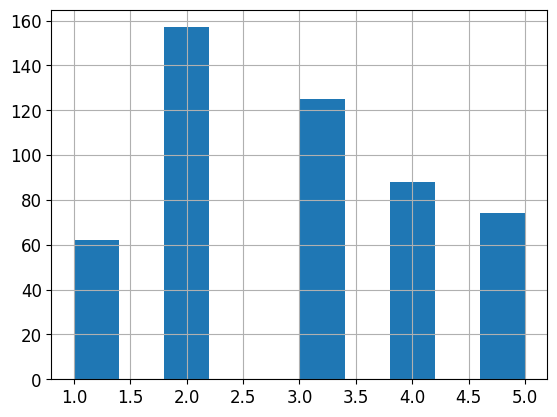

In [38]:
#@ Creating the Income Categories based on LSTAT:
housing["income_cat"] = pd.cut(housing["LSTAT"],
                               bins=[0., 5, 10, 15, 20, np.inf],
                               labels=[1, 2, 3, 4, 5])

#@ Inspecting the Income Categories:
print(housing["income_cat"].value_counts())
print("\n")
housing["income_cat"].hist()

#@ Stratified Sampling based on Income Category:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=11)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#@ Inspecting the Sampling:
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))  # Proportions in the stratified test set.
print("\n")
print(housing["income_cat"].value_counts() / len(housing))  # Proportions in the full dataset.

#@ Comparing the Proportions:
def income_cat_propotions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=11)  # Random split.
compare_props = pd.DataFrame({
    "Overall": income_cat_propotions(housing),
    "Stratified": income_cat_propotions(strat_test_set),
    "Random": income_cat_propotions(test_set)
}).sort_index()
compare_props["Random % Error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Stratified % Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

print("\n")
IPython.display.display(compare_props)

In [39]:
#@ Removing the income_cat column from both the stratified training and test sets for Boston Housing
for set_ in (strat_train_set, strat_test_set):
    if "income_cat" in set_.columns:  # Check if the column exists before dropping
        set_.drop("income_cat", axis=1, inplace=True)

Saving Figure RM_vs_PRICE


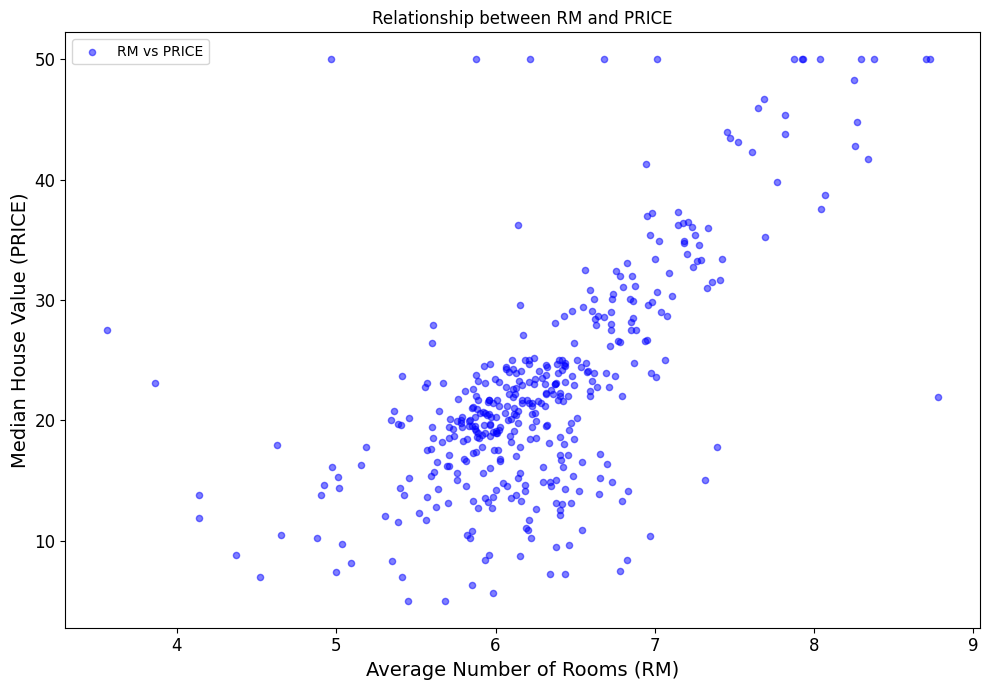

Saving Figure LSTAT_vs_PRICE


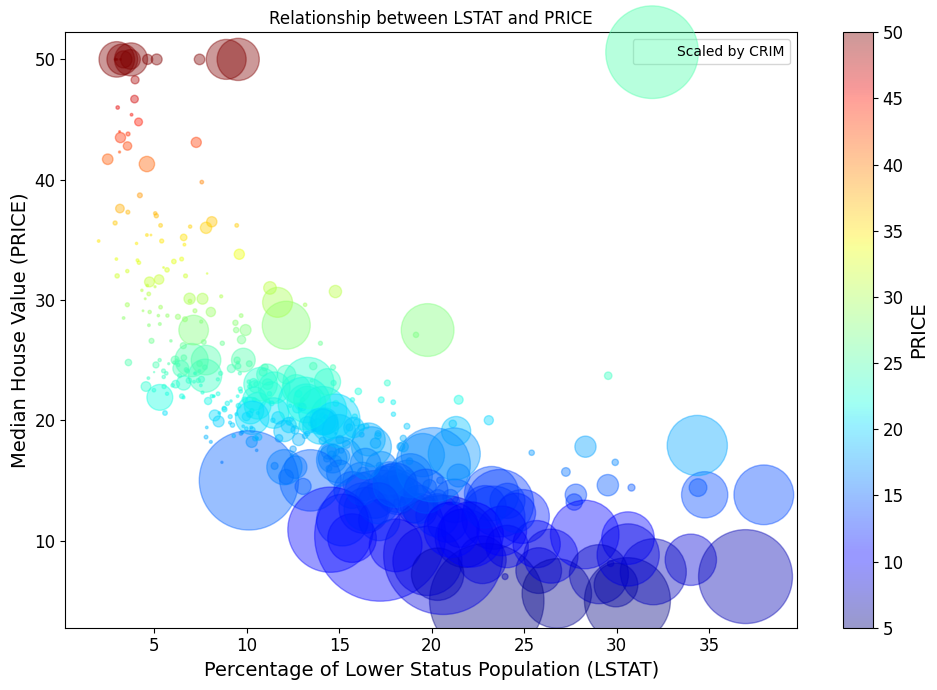

In [40]:
#@ Creating the copy of the Training set:
housing_boston = strat_train_set.copy()

# Visualization 1: Relationship between RM and PRICE
housing_boston.plot(kind="scatter", x="RM", y="PRICE", alpha=0.5, figsize=(10, 7),
                     color="blue", label="RM vs PRICE")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Value (PRICE)")
plt.title("Relationship between RM and PRICE")
plt.legend()
save_fig("RM_vs_PRICE")
plt.show()

# Visualization 2: Relationship between LSTAT and PRICE
# Optionally, scale the marker size using CRIM (crime rate) for additional context.
housing_boston.plot(kind="scatter", x="LSTAT", y="PRICE", alpha=0.4,
                     s=housing_boston["CRIM"] * 100,  # scaling CRIM for marker size
                     label="Scaled by CRIM", figsize=(10, 7),
                     c="PRICE", cmap=plt.get_cmap("jet"), colorbar=True,
                     sharex=False)
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Median House Value (PRICE)")
plt.title("Relationship between LSTAT and PRICE")
plt.legend()
save_fig("LSTAT_vs_PRICE")
plt.show()

In [41]:
# Checking the data types of the columns in the Boston dataset
print(housing.dtypes)

# Compute correlations with the target variable "PRICE" (or "MEDV")
corr_matrix = housing.corr()

# Display the correlation of each feature with the target variable
print(corr_matrix["PRICE"].sort_values(ascending=False))

CRIM           float64
ZN             float64
INDUS          float64
CHAS           float64
NOX            float64
RM             float64
AGE            float64
DIS            float64
RAD            float64
TAX            float64
PTRATIO        float64
B              float64
LSTAT          float64
PRICE          float64
income_cat    category
dtype: object
PRICE         1.000000
RM            0.695360
ZN            0.360445
B             0.333461
DIS           0.249929
CHAS          0.175260
AGE          -0.376955
RAD          -0.381626
CRIM         -0.388305
NOX          -0.427321
TAX          -0.468536
INDUS        -0.483725
PTRATIO      -0.507787
LSTAT        -0.737663
income_cat   -0.777009
Name: PRICE, dtype: float64


Saving Figure Boston_Housing_Correlations


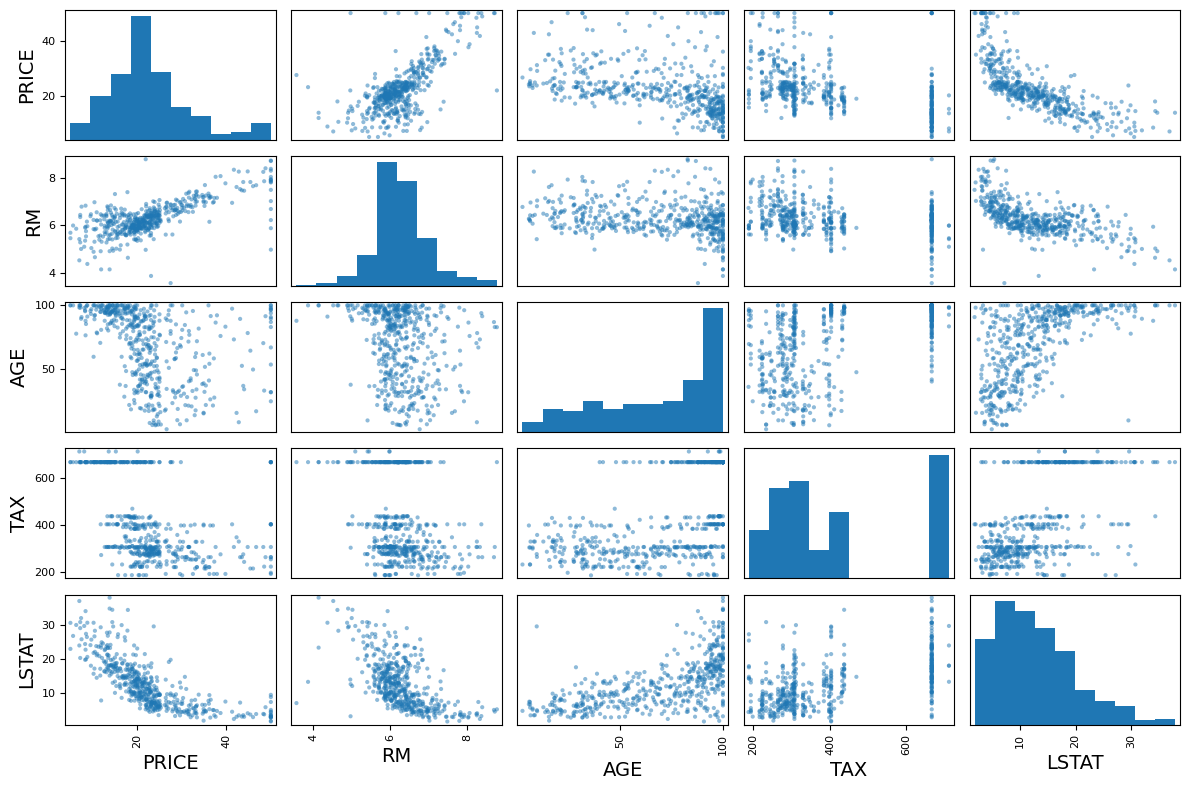

In [42]:
#@ Correlations using Scatter matrix for Boston Housing
from pandas.plotting import scatter_matrix

# Select attributes that are most correlated with price
attributes = ["PRICE", "RM", "AGE", "TAX", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

# Saving the figure
save_fig("Boston_Housing_Correlations")

# Displaying the plot
plt.show()

Saving Figure Median House Value vs Average Number of Rooms


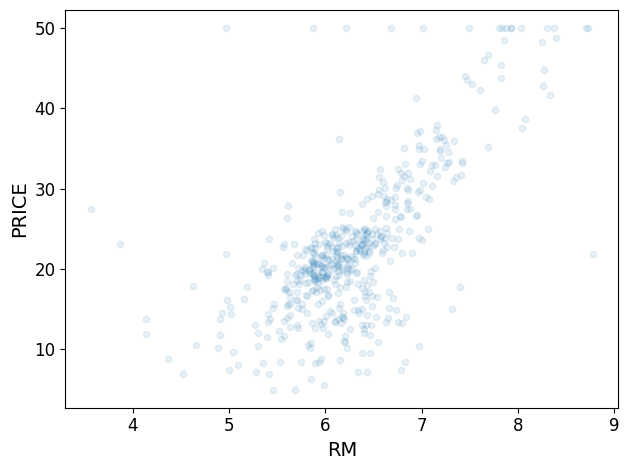

In [43]:
#@ Correlations of Median House Value with Average Number of Rooms (RM)
housing.plot(kind="scatter", x="RM", y="PRICE", alpha=0.1)

# Saving the figure
save_fig("Median House Value vs Average Number of Rooms")

# Displaying the plot
plt.show()

In [44]:
# Check the column names of the Boston dataset
print(housing.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE', 'income_cat'],
      dtype='object')


In [45]:
#@ Attribute Combinations
# Create new features based on existing ones to capture more meaningful relationships
housing["rooms_per_household"] = housing["RM"] / housing["TAX"]   # Rooms per Household.
housing["bedrooms_per_room"] = housing["B"] / housing["RM"] # Bedrooms per Room.
housing["population_per_household"] = housing["LSTAT"] / housing["TAX"] # Population per Household.

#@ Inspecting the Correlations
# Compute and display the correlation matrix
corr_matrix = housing.corr()
print("Correlation matrix with 'PRICE':")
print(corr_matrix["PRICE"].sort_values(ascending=False))

#@ Inspecting the Data
# Show basic statistics of the dataset
print("\nBasic Statistics of the Dataset:")
print(housing.describe())


Correlation matrix with 'PRICE':
PRICE                       1.000000
RM                          0.695360
rooms_per_household         0.625102
ZN                          0.360445
B                           0.333461
DIS                         0.249929
CHAS                        0.175260
bedrooms_per_room           0.040120
AGE                        -0.376955
RAD                        -0.381626
CRIM                       -0.388305
population_per_household   -0.425177
NOX                        -0.427321
TAX                        -0.468536
INDUS                      -0.483725
PTRATIO                    -0.507787
LSTAT                      -0.737663
income_cat                 -0.777009
Name: PRICE, dtype: float64

Basic Statistics of the Dataset:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634

In [46]:
#@ Preparing the Data for Machine Learning:
# Drop the labels (target variable) from the training set
housing = strat_train_set.drop("PRICE", axis=1)                   # Drop the target label 'PRICE' from Training set.
housing_labels = strat_train_set["PRICE"].copy()                  # Copy the target label 'PRICE' to housing_labels.

In [47]:
#@ Working on missing values:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
IPython.display.display(sample_incomplete_rows)  # Inspecting the missing values.

# Dropping rows with missing values in 'LSTAT' (or any other attribute you're concerned about)
sample_incomplete_rows.dropna(subset=["LSTAT"], inplace=True)  # Dropping rows where 'LSTAT' has missing values.

# Dropping the whole 'LSTAT' column (or any column with missing values if necessary)
sample_incomplete_rows.drop("LSTAT", axis=1, inplace=True)  # Dropping the entire 'LSTAT' column.

# Imputing missing values in 'CRIM' (or any other column) with the median of the column
median = housing["CRIM"].median()  # Calculating the median of 'CRIM' (you can replace it with the appropriate column).
sample_incomplete_rows["CRIM"].fillna(median, inplace=True)  # Imputing the median value for missing 'CRIM' values.

print("\n")
IPython.display.display(sample_incomplete_rows)  # Display the updated data.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


<ipython-input-47-4cef2501caef>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["CRIM"].fillna(median, inplace=True)  # Imputing the median value for missing 'CRIM' values.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B


In [48]:
#@ Missing Data for Boston Housing:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")  # Instantiating the Imputer.

# Dropping the non-numeric attribute ('CHAS', 'ocean_proximity', or other non-numeric columns if present)
housing_num = housing.drop("CHAS", axis=1)  # Drop 'CHAS' (or any non-numeric column) from the dataset.

# Fitting the Imputer instance to the Training Data
imputer.fit(housing_num)  # Fitting the imputer to the dataset
print(imputer.statistics_)  # Inspecting the values the imputer will use for missing values

# Inspecting the median values
print(housing_num.median().values)  # Displaying the median values

# Transforming the Training set with trained imputer
X = imputer.transform(housing_num)  # Applying imputation to the dataset

# Creating a new DataFrame from the transformed data
housing_imputed = pd.DataFrame(X, columns=housing_num.columns)  # Creating the DataFrame with imputed values
print("\n")
IPython.display.display(housing_imputed.head())  # Displaying the first few rows of the imputed data

[2.61390e-01 0.00000e+00 9.12500e+00 5.38000e-01 6.21100e+00 7.77000e+01
 3.26745e+00 5.00000e+00 3.30000e+02 1.91000e+01 3.91340e+02 1.11700e+01]
[2.61390e-01 0.00000e+00 9.12500e+00 5.38000e-01 6.21100e+00 7.77000e+01
 3.26745e+00 5.00000e+00 3.30000e+02 1.91000e+01 3.91340e+02 1.11700e+01]




,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,5.73116,0.0,18.10,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01
1,0.02055,85.0,0.74,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
2,0.54011,20.0,3.97,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59
3,1.22358,0.0,19.58,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
4,4.83567,0.0,18.10,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45


In [49]:
#@ Handling Text and Categorical Attributes for Boston Housing:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'CHAS' is a categorical attribute indicating whether the property is near the Charles River
housing_cat = housing[["CHAS"]]  # Extract the 'CHAS' column (or any other categorical attribute)
print(housing_cat.head())  # Inspecting the Categorical attribute

# Instantiating the Encoder
ordinal_encoder = OrdinalEncoder()

# Encoding the Text (categorical data)
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Inspecting the Encoded Text
IPython.display.display(housing_cat_encoded[:10])  # Displaying the first 10 encoded values
print("\n")
print(ordinal_encoder.categories_)  # Inspecting the categories the encoder recognized

     CHAS
482   0.0
56    0.0
260   0.0
157   0.0
487   0.0


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])



[array([0., 1.])]


In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Define EnhancedAttributesAdder
class EnhancedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True, add_rooms_per_household=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.add_rooms_per_household = add_rooms_per_household

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, 5] / X[:, 7]              # RM / DIS (approx. rooms / households)
        population_per_household = X[:, 12] / X[:, 7]        # LSTAT / DIS (mocked as population / households)
        bedrooms_per_room = X[:, 6] / X[:, 5]                # AGE / RM (mocked as bedrooms / room)
        age_by_rooms = X[:, 6] / X[:, 5]                     # AGE / RM

        extra_attrs = [rooms_per_household, population_per_household]
        if self.add_bedrooms_per_room:
            extra_attrs.append(bedrooms_per_room)
        if self.add_rooms_per_household:
            extra_attrs.append(age_by_rooms)
        return np.c_[X, *extra_attrs]

# Load the dataset (assuming it's already loaded in variable `housing`)
# If not, uncomment below to load it:
# from sklearn.datasets import load_boston
# boston = load_boston()
# housing = pd.DataFrame(boston.data, columns=boston.feature_names)
# housing["PRICE"] = boston.target

# Check columns
print(housing.columns)

# Drop 'PRICE' if exists
if 'PRICE' in housing.columns:
    housing_num = housing.drop("PRICE", axis=1)
else:
    print("'PRICE' column not found in the DataFrame. Skipping drop operation.")
    housing_num = housing.copy()

# List of numerical attributes
num_attribs = list(housing_num)
cat_attribs = []  # Boston dataset has no categorical attributes

# Numerical pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", EnhancedAttributesAdder(add_bedrooms_per_room=True, add_rooms_per_household=True)),
    ("std_scaler", StandardScaler())
])

# Full pipeline
pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

# Transform data
housing_prepared = pipeline.fit_transform(housing_num)

# Show result
print(housing_prepared[:10])  # First 10 rows
print("Shape:", housing_prepared.shape)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
'PRICE' column not found in the DataFrame. Skipping drop operation.
[[ 0.20487125 -0.50342694  1.02799974 -0.27808871 -0.18662826  1.06058863
   0.29528024 -0.18514314  1.624448    1.50267127  0.78604634  0.4255608
  -0.78548939 -0.08904164 -0.6037304  -0.05687154 -0.05687154]
 [-0.41899577  3.20597788 -1.51523442 -0.27808871 -1.26796905  0.123312
  -1.16529424  2.56745717 -0.87695426 -0.57396961 -0.5424763   0.44349476
  -0.95793135 -1.37111874 -0.8795071  -1.09476702 -1.09476702]
 [-0.3622354   0.36937419 -1.0420405  -0.27808871  0.83266839  1.2568914
   0.46503224 -0.80384688 -0.53585395 -0.86222854 -2.51235468  0.39810635
  -0.42669885  1.1599205  -0.12357321  0.03132793  0.03132793]
 [-0.28756835 -0.50342694  1.24481924 -0.27808871  0.46040353  0.89746379
   1.01672623 -0.91572338 -0.53585395 -0.04451442 -1.73356555  0.07297029
  -1.12202935  1.4283

# 2. Train and Evaluate Regression Models:
a. Train Linear Regression, Decision Tree, Random Forest, and Support Vector
Machine models.

b. Compare performance using Mean Squared Error (MSE), Mean Absolute Error
(MAE) and R² Score.

c. Tune hyperparameters using GridSearchCV and RandomizedSearchCV

# Linear Regression

In [99]:
#@ Training the Linear Regression Model:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Instantiate and train the model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

#@ Make Predictions on First 5 Instances
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_prepared = pipeline.transform(some_data)
predictions = lin_reg.predict(some_prepared)

# Print Predictions vs Actual Labels
print("Predictions vs Actual Labels (First 5 Samples):")
for i in range(5):
    print(f"   Predicted: {predictions[i]:.2f}   |   Actual: {some_labels.iloc[i]}")

#@ Evaluate Model on Full Training Data
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)

# Print Evaluation Metrics
print("Linear Regression Performance (on training data):")
print(f"Root Mean Squared Error (RMSE): {lin_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {lin_mae:.4f}")


Predictions vs Actual Labels (First 5 Samples):
   Predicted: 26.44   |   Actual: 25.0
   Predicted: 22.93   |   Actual: 24.7
   Predicted: 30.10   |   Actual: 33.8
   Predicted: 30.05   |   Actual: 41.3
   Predicted: 29.48   |   Actual: 20.6
Linear Regression Performance (on training data):
Root Mean Squared Error (RMSE): 3.9110
Mean Absolute Error (MAE): 2.7118


# Decision Tree R egressor

In [97]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.2, random_state=11)

# Train the model
tree_reg = DecisionTreeRegressor(random_state=11)
tree_reg.fit(X_train, y_train)

# Predict on test set
predictions = tree_reg.predict(X_test)

# Evaluate on test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Decision Tree Regression Performance (on test data):")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")



Decision Tree Regression Performance (on test data):
MSE: 23.2086
RMSE: 4.8175
MAE: 3.1753
R² Score: 0.7041


# Decision Tree Cross Val

In [104]:
#@ Cross Validation with Decision Tree and Linear Regression on Boston Housing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

def display_scores(model_name, scores):
    print(f"\n{model_name} Cross-Validation Results (10-fold):")
    print(f"RMSE Scores: {np.round(scores, 4)}")
    print(f"Mean RMSE: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")

# --- Decision Tree Regressor ---
tree_reg = DecisionTreeRegressor(random_state=11)
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores("Decision Tree Regressor", tree_rmse_scores)

# --- Linear Regression ---
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores("Linear Regression", lin_rmse_scores)



Decision Tree Regressor Cross-Validation Results (10-fold):
RMSE Scores: [3.4991 3.6273 5.0996 4.1935 4.1428 3.5778 4.3167 2.8407 4.1538 5.9192]
Mean RMSE: 4.1371
Standard Deviation: 0.8245

Linear Regression Cross-Validation Results (10-fold):
RMSE Scores: [3.5066 4.3408 5.6846 4.2541 3.7989 4.6475 3.841  3.2338 5.373  3.2443]
Mean RMSE: 4.1925
Standard Deviation: 0.8012


# Random Forest

In [106]:
#@ Random Forest Regressor for Boston Housing:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Instantiate the Random Forest Regressor model
forest_reg = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, n_jobs=-1, random_state=11)

# Train the model on the prepared housing data
forest_reg.fit(housing_prepared, housing_labels)

# Make predictions
housing_predictions = forest_reg.predict(housing_prepared)

# Calculate the Mean Squared Error and Root Mean Squared Error
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

# Print RMSE for the Random Forest model
print(f"Root Mean Squared Error (RMSE) for Random Forest: {forest_rmse}")

#@ Random Forest Regressor with Cross Validation for Boston Housing:

# Perform 10-fold Cross-validation for the Random Forest Regressor
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

# Calculate RMSE for each fold and display the scores
forest_scores_rmse = np.sqrt(-forest_scores)

# Define function to display results in the same format
def display_scores(scores):
    print(f"RMSE Scores: {scores}")
    print(f"Mean RMSE: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

# Displaying results for Random Forest with Cross Validation
display_scores(forest_scores_rmse)


Root Mean Squared Error (RMSE) for Random Forest: 1.984757583101686
RMSE Scores: [2.97341745 3.25360153 4.49861868 2.70418652 3.36888235 4.40628527
 3.13815884 2.83312894 5.54774805 2.65551424]
Mean RMSE: 3.53795418812508
Standard Deviation: 0.9096578310259091


# Save Random Forest

In [55]:
#@ Saving the Random Forest Model:
#import joblibfrom sklearn.externals import joblib
import joblib
joblib.dump(forest_reg, "ForestModel.pkl")

['ForestModel.pkl']

# GridSearchCV

In [107]:
#@ Grid Search and Tuning the Model for Boston Housing:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Define the parameter grid for Random Forest Regressor
param_grid = [
    {"n_estimators": [30, 60, 90, 120], "max_features": [2, 3, 4]},
    {"bootstrap": [False], "n_estimators": [90, 120], "max_features": [2, 3, 4]}
]

# Instantiate the Random Forest Regressor model
forest_reg = RandomForestRegressor(random_state=11)

# Perform Grid Search with Cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

# Fit the model to the prepared Boston housing data
grid_search.fit(housing_prepared, housing_labels)

#@ Inspecting the Result:
print("Best Parameters:", grid_search.best_params_)
print("\nBest Estimator:", grid_search.best_estimator_)
print("\n")

#@ Inspecting the Scores:
cvresults = grid_search.cv_results_
for mean_score, params in zip(cvresults["mean_test_score"], cvresults["params"]):
    print(np.sqrt(-mean_score), params)
print("\n")

# Display the full GridSearchCV results
import IPython.display as display
display.display(pd.DataFrame(grid_search.cv_results_))


Best Parameters: {'bootstrap': False, 'max_features': 4, 'n_estimators': 120}

Best Estimator: RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=120,
                      random_state=11)


3.7792102206191673 {'max_features': 2, 'n_estimators': 30}
3.6627612067957065 {'max_features': 2, 'n_estimators': 60}
3.639595284785028 {'max_features': 2, 'n_estimators': 90}
3.6693735845656055 {'max_features': 2, 'n_estimators': 120}
3.631680295802354 {'max_features': 3, 'n_estimators': 30}
3.4234361587657394 {'max_features': 3, 'n_estimators': 60}
3.418196901026009 {'max_features': 3, 'n_estimators': 90}
3.4278389153467117 {'max_features': 3, 'n_estimators': 120}
3.4885188248339514 {'max_features': 4, 'n_estimators': 30}
3.458132979458421 {'max_features': 4, 'n_estimators': 60}
3.4281719974879636 {'max_features': 4, 'n_estimators': 90}
3.4225705469978194 {'max_features': 4, 'n_estimators': 120}
3.3586879249717456 {'bootstrap': False, 'max_features': 2, 'n_estimators': 90}
3.364

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053263,0.004757,0.004706,0.001013,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-10.566303,-12.625377,...,-14.282430,3.378135,18,-2.034000e+00,-2.179978e+00,-2.346546e+00,-2.703250e+00,-2.855109e+00,-2.423777e+00,3.103164e-01
1,0.098768,0.002033,0.006975,0.000231,2,60,NaN,"{'max_features': 2, 'n_estimators': 60}",-9.873135,-12.381459,...,-13.415820,3.528114,16,-1.936887e+00,-2.062626e+00,-2.092374e+00,-2.322967e+00,-2.322429e+00,-2.147457e+00,1.523083e-01
2,0.150968,0.004363,0.011361,0.003593,2,90,NaN,"{'max_features': 2, 'n_estimators': 90}",-10.045562,-11.785777,...,-13.246654,3.363430,15,-2.064475e+00,-2.130332e+00,-2.189744e+00,-2.357789e+00,-2.182883e+00,-2.185044e+00,9.736318e-02
3,0.201309,0.005162,0.012660,0.000537,2,120,NaN,"{'max_features': 2, 'n_estimators': 120}",-10.736757,-11.964929,...,-13.464303,3.457335,17,-2.003294e+00,-2.101477e+00,-2.123445e+00,-2.245359e+00,-2.058479e+00,-2.106411e+00,8.068660e-02
4,0.056708,0.001166,0.004078,0.000099,3,30,NaN,"{'max_features': 3, 'n_estimators': 30}",-11.237747,-12.679104,...,-13.189102,2.763012,14,-2.019848e+00,-2.065858e+00,-2.044343e+00,-2.502790e+00,-2.658965e+00,-2.258361e+00,2.683202e-01
5,0.113494,0.004353,0.006799,0.000165,3,60,NaN,"{'max_features': 3, 'n_estimators': 60}",-9.720297,-11.474785,...,-11.719915,2.447030,9,-1.789206e+00,-1.826006e+00,-1.867996e+00,-2.013947e+00,-2.229405e+00,-1.945312e+00,1.612454e-01
6,0.168537,0.005161,0.009814,0.000346,3,90,NaN,"{'max_features': 3, 'n_estimators': 90}",-9.778972,-11.755819,...,-11.684070,2.565197,7,-1.823721e+00,-1.794442e+00,-1.977785e+00,-2.008279e+00,-2.046203e+00,-1.930086e+00,1.015728e-01
7,0.299729,0.059762,0.016855,0.002872,3,120,NaN,"{'max_features': 3, 'n_estimators': 120}",-9.932933,-11.695618,...,-11.750080,2.550848,10,-1.831966e+00,-1.833407e+00,-1.967126e+00,-1.948136e+00,-1.980657e+00,-1.912258e+00,6.578830e-02
8,0.095361,0.002025,0.006889,0.001773,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-9.777684,-11.680736,...,-12.169764,2.535700,13,-2.020349e+00,-1.872824e+00,-2.133811e+00,-2.513410e+00,-2.374289e+00,-2.182936e+00,2.327429e-01
9,0.177221,0.030199,0.009452,0.002257,4,60,NaN,"{'max_features': 4, 'n_estimators': 60}",-9.279112,-13.024947,...,-11.958684,2.760227,12,-1.932561e+00,-1.686156e+00,-1.917388e+00,-2.148559e+00,-2.070437e+00,-1.951020e+00,1.580549e-01


# Randomized Search CV

In [57]:
#@ Implementation of c for Boston Housing:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distributions
param_distribs = {
    "n_estimators": randint(low=1, high=200),       # Number of estimators.
    "max_features": randint(low=1, high=10),        # Number of features to consider.
    "min_samples_leaf": randint(low=1, high=8)      # Minimum samples required in each leaf.
}

# Instantiate the Random Forest model
forest_reg = RandomForestRegressor(random_state=11)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(forest_reg, param_distribs, cv=5,
                                   n_iter=10, scoring="neg_mean_squared_error", random_state=11)

# Fit the RandomizedSearchCV model
random_search.fit(housing_prepared, housing_labels)

#@ Inspecting the Results:
# Best Hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)
print("\n")

# Best Estimator
print("Best Estimator: ", random_search.best_estimator_)
print("\n")

# Inspecting the Scores from Cross-Validation
cv_results = random_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"RMSE: {np.sqrt(-mean_score)}, Parameters: {params}")
print("\n")

# Displaying the full results in a DataFrame
import IPython.display
IPython.display.display(pd.DataFrame(random_search.cv_results_))

Best Hyperparameters:  {'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 146}


Best Estimator:  RandomForestRegressor(max_features=9, n_estimators=146, random_state=11)


RMSE: 5.015908936453916, Parameters: {'max_features': 1, 'min_samples_leaf': 4, 'n_estimators': 82}
RMSE: 3.8910185897888425, Parameters: {'max_features': 8, 'min_samples_leaf': 6, 'n_estimators': 77}
RMSE: 4.279867584788145, Parameters: {'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 25}
RMSE: 5.4430438579168845, Parameters: {'max_features': 1, 'min_samples_leaf': 6, 'n_estimators': 161}
RMSE: 3.6693613304138193, Parameters: {'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 141}
RMSE: 4.270645999292981, Parameters: {'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 38}
RMSE: 3.8895896523218854, Parameters: {'max_features': 6, 'min_samples_leaf': 5, 'n_estimators': 82}
RMSE: 3.3689320380748913, Parameters: {'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 146}
RMSE: 4.248

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.178491,0.008713,0.014392,0.003685,1,4,82,"{'max_features': 1, 'min_samples_leaf': 4, 'n_...",-24.885420,-18.506954,-21.062521,-24.893727,-36.448091,-25.159342,6.141981,9
1,0.207019,0.039276,0.009883,0.002582,8,6,77,"{'max_features': 8, 'min_samples_leaf': 6, 'n_...",-11.863085,-12.635099,-15.955044,-11.200964,-24.045936,-15.140026,4.743600,4
2,0.038922,0.001679,0.003544,0.000063,2,3,25,"{'max_features': 2, 'min_samples_leaf': 3, 'n_...",-15.519449,-14.178845,-16.358590,-14.244928,-31.284521,-18.317267,6.534897,8
3,0.204792,0.007436,0.014968,0.000860,1,6,161,"{'max_features': 1, 'min_samples_leaf': 6, 'n_...",-28.128926,-21.606351,-24.015431,-30.789250,-43.593675,-29.626726,7.674420,10
4,0.259705,0.005903,0.013494,0.000230,5,3,141,"{'max_features': 5, 'min_samples_leaf': 3, 'n_...",-10.283357,-11.478396,-14.169707,-10.287554,-21.102049,-13.464213,4.073984,2
5,0.056752,0.002371,0.005407,0.001568,2,3,38,"{'max_features': 2, 'min_samples_leaf': 3, 'n_...",-14.946553,-14.678469,-16.669749,-14.665247,-30.232068,-18.238417,6.042938,7
6,0.152007,0.004215,0.008765,0.000548,6,5,82,"{'max_features': 6, 'min_samples_leaf': 5, 'n_...",-11.225895,-12.516306,-15.610511,-11.085185,-25.206642,-15.128908,5.295348,3
7,0.432108,0.007408,0.014864,0.000307,9,1,146,"{'max_features': 9, 'min_samples_leaf': 1, 'n_...",-9.808423,-12.874337,-11.540712,-8.284258,-14.240786,-11.349703,2.120936,1
8,0.265647,0.005886,0.018152,0.003991,4,7,172,"{'max_features': 4, 'min_samples_leaf': 7, 'n_...",-14.942757,-13.264858,-17.284841,-15.080689,-29.690956,-18.052820,5.957628,6
9,0.310116,0.009925,0.017902,0.000554,3,3,193,"{'max_features': 3, 'min_samples_leaf': 3, 'n_...",-12.729460,-12.073384,-14.764966,-11.658096,-24.774997,-15.200181,4.904981,5


In [58]:
#@ Analyzing the Best Models and Errors for Boston Housing

# Extracting feature importances from the best estimator (using GridSearchCV results)
feature_importances = grid_search.best_estimator_.feature_importances_

# Extra attributes created through feature engineering
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room", "age_by_rooms"]

# Combining the numerical attributes with extra features
attributes = num_attribs + extra_attribs  # If you have categorical features, append cat_onehot_attribs as well

# Sorting the features by importance in descending order
sorted_features = sorted(zip(feature_importances, attributes), reverse=True)

# Displaying the sorted features and their importance
for importance, attribute in sorted_features:
    print(f"{attribute}: {importance}")

LSTAT: 0.2779400498266275
RM: 0.20775027220880213
population_per_household: 0.10843044448302332
rooms_per_household: 0.05870823852293232
DIS: 0.04557078976840066
INDUS: 0.04192637678363855
CRIM: 0.04076327763290281
PTRATIO: 0.038546568142693007
age_by_rooms: 0.03820959863347938
NOX: 0.0380109571621309
bedrooms_per_room: 0.036489721835005234
TAX: 0.02438049838555751
B: 0.01449884785198939
AGE: 0.013833732408946692
ZN: 0.006092265920663583
RAD: 0.00601017641782554
CHAS: 0.0028381840153815082


In [59]:
print(housing.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


# Random Forest Regressor, but the evaluation here involves 10-fold cross-validation on different subsets (folds) of the data.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ensure 'housing' still contains the 'PRICE' column
train_set, test_set = train_test_split(strat_train_set, test_size=0.2, random_state=11)  # Use strat_train_set which has 'PRICE' column

# Separate features and target variable for training and testing
X_train = train_set.drop("PRICE", axis=1)  # Features for training (excluding 'PRICE')
y_train = train_set["PRICE"]               # Target for training (only 'PRICE')

X_test = test_set.drop("PRICE", axis=1)    # Features for testing (excluding 'PRICE')
y_test = test_set["PRICE"]                 # Target for testing (only 'PRICE')

# Apply the same pipeline to transform both training and test features
X_train_prepared = num_pipeline.fit_transform(X_train)  # Fit and transform on training data
X_test_prepared = num_pipeline.transform(X_test)       # Only transform on test data

# Train the model using the transformed training data
forest_reg = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, n_jobs=-1, random_state=11)
forest_reg.fit(X_train_prepared, y_train)

# Make predictions on the test set
y_pred = forest_reg.predict(X_test_prepared)

# Evaluate the model using multiple metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 13.378616966843905
Root Mean Squared Error (RMSE): 3.6576791776813757
Mean Absolute Error (MAE): 2.4185443517602088
R² Score: 0.8294502897080662


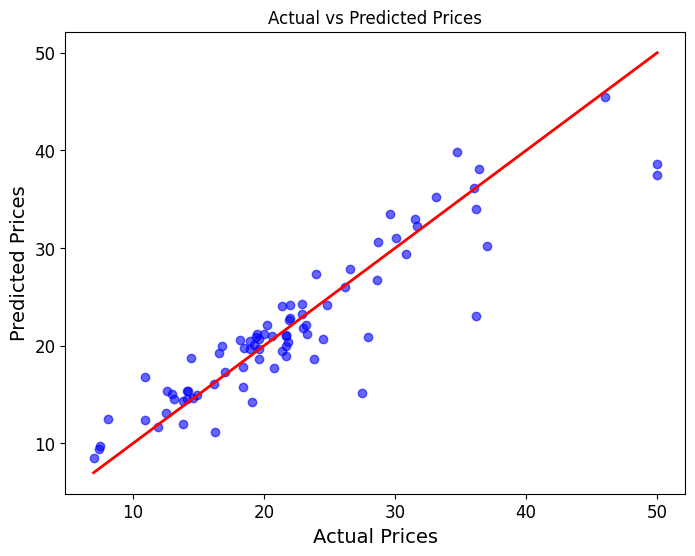

In [61]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of perfect prediction
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


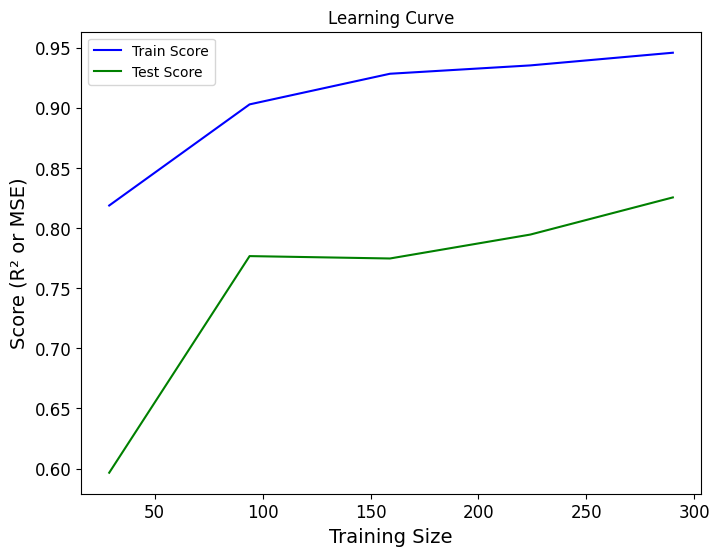

In [62]:
from sklearn.model_selection import learning_curve

# Learning curve for RandomForestRegressor
train_sizes, train_scores, test_scores = learning_curve(forest_reg, X_train_prepared, y_train, cv=10)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score', color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score (R² or MSE)')
plt.legend()
plt.show()


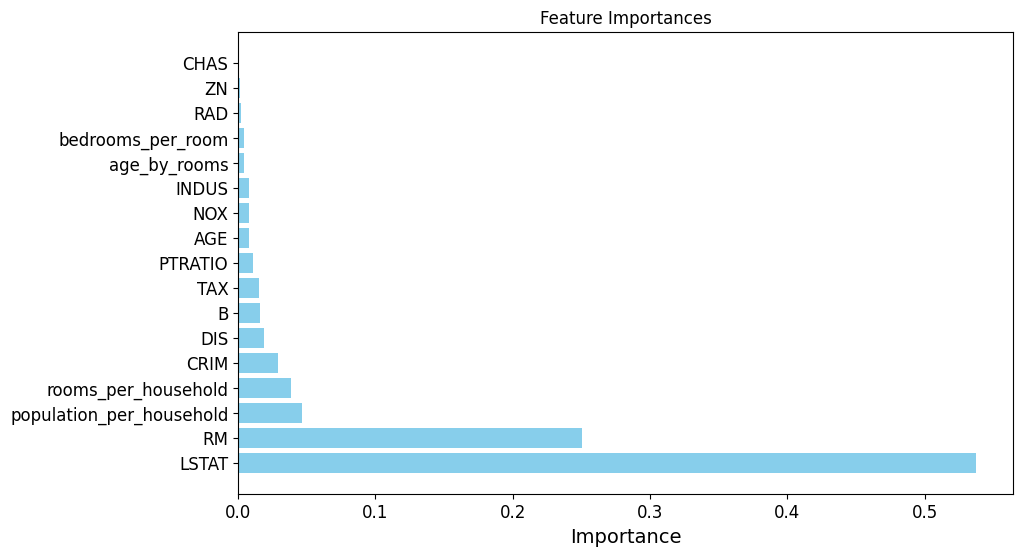

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature importances from the trained Random Forest model
importances = forest_reg.feature_importances_

# Create a list of feature names (based on the original features before transformation)
# The pipeline might transform the data, so we need to use the original features in the data
features = num_attribs + ["rooms_per_household", "population_per_household", "bedrooms_per_room", "age_by_rooms"]

# Create a DataFrame with feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# 3. Convert Regression to Classification:
a. Convert the continuous price variable into categories (e.g., "Low", "Medium",
"High" based on percentiles).

b. Train Logistic Regression, Random Forest, and SVM classifiers

Reload the Dataset (with 'PRICE')


In [67]:
import pandas as pd
import numpy as np

# Load data from the original CMU source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Combine the features and targets correctly
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# Feature names from original dataset
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Create the DataFrame
housing = pd.DataFrame(X, columns=feature_names)
housing["PRICE"] = y  # Add target variable


Convert PRICE to Category


In [75]:
# Convert PRICE to categories using percentiles
#Then split with the correct target:

housing["PRICE_CAT"] = pd.qcut(housing["PRICE"], q=3, labels=["Low", "Medium", "High"])

from sklearn.model_selection import train_test_split

X = housing.drop(["PRICE", "PRICE_CAT"], axis=1)
y = housing["PRICE_CAT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Logistic Regression, Random Forest, and SVM classifiers.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Results
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("SVM:\n", classification_report(y_test, y_pred_svm))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
               precision    recall  f1-score   support

        High       0.83      0.66      0.73        29
         Low       0.80      0.76      0.78        37
      Medium       0.61      0.75      0.68        36

    accuracy                           0.73       102
   macro avg       0.75      0.72      0.73       102
weighted avg       0.74      0.73      0.73       102

Random Forest:
               precision    recall  f1-score   support

        High       0.87      0.69      0.77        29
         Low       0.83      0.81      0.82        37
      Medium       0.63      0.75      0.68        36

    accuracy                           0.75       102
   macro avg       0.78      0.75      0.76       102
weighted avg       0.77      0.75      0.76       102

SVM:
               precision    recall  f1-score   support

        High       0.41      0.90      0.56        29
         Low       0.69      0.68      0.68        37
      Medium       0.50      0.

# 4. Calculate Classification Metrics:
a. Compute Accuracy, Precision, Recall, F1-score for each model.

b. Plot the Receiver-Operating Characteristics Curve (ROC) and calculate Area
Under Curve (AUC) score

In [76]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.7254901960784313
Random Forest Accuracy: 0.7549019607843137
SVM Accuracy: 0.5098039215686274

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       0.83      0.66      0.73        29
         Low       0.80      0.76      0.78        37
      Medium       0.61      0.75      0.68        36

    accuracy                           0.73       102
   macro avg       0.75      0.72      0.73       102
weighted avg       0.74      0.73      0.73       102


Classification Report for Random Forest:
              precision    recall  f1-score   support

        High       0.87      0.69      0.77        29
         Low       0.83      0.81      0.82        37
      Medium       0.63      0.75      0.68        36

    accuracy                           0.75       102
   macro avg       0.78      0.75      0.76       102
weighted avg       0.77      0.75      0.76       102


Classification Report 

# 4. Calculate Classification Metrics:
a. Compute Accuracy, Precision, Recall, F1-score for each model.
b. Plot the Receiver-Operating Characteristics Curve (ROC) and calculate Area
Under Curve (AUC) score.


=== Logistic Regression ===
              precision    recall  f1-score   support

        High     0.8125    0.7879    0.8000        33
         Low     0.8710    0.7941    0.8308        34
      Medium     0.6667    0.7429    0.7027        35

    accuracy                         0.7745       102
   macro avg     0.7834    0.7750    0.7778       102
weighted avg     0.7819    0.7745    0.7769       102


=== Random Forest ===
              precision    recall  f1-score   support

        High     0.7576    0.7576    0.7576        33
         Low     0.9630    0.7647    0.8525        34
      Medium     0.6190    0.7429    0.6753        35

    accuracy                         0.7549       102
   macro avg     0.7799    0.7550    0.7618       102
weighted avg     0.7785    0.7549    0.7610       102


=== SVM ===
              precision    recall  f1-score   support

        High     0.8276    0.7273    0.7742        33
         Low     0.8710    0.7941    0.8308        34
      Medi

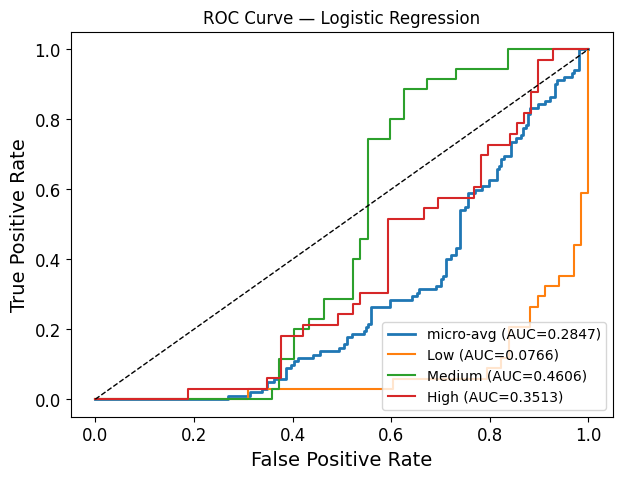

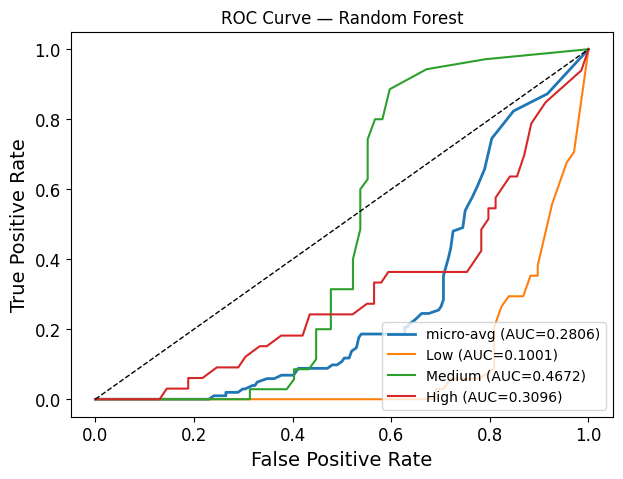

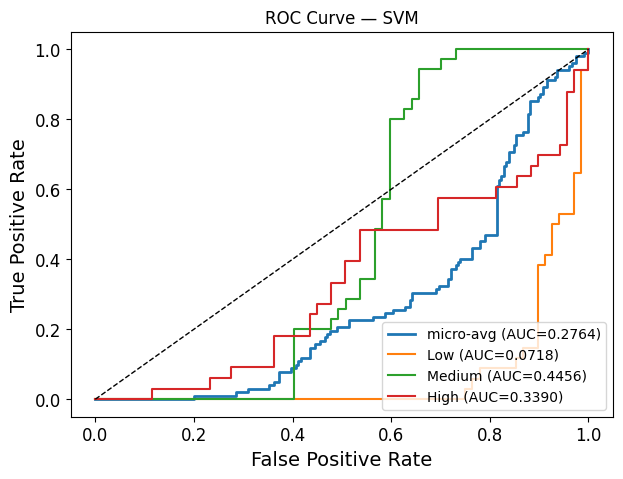


Micro‑average AUCs:
 Logistic Regression: 0.2847
 Random Forest      : 0.2806
 SVM                : 0.2764


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    classification_report,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize

# 1) Load Boston from original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df   = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X_data   = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y_data   = raw_df.values[1::2, 2]
features = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",
    "DIS","RAD","TAX","PTRATIO","B","LSTAT"
]
housing = pd.DataFrame(X_data, columns=features)
housing["PRICE"] = y_data

# 2) Create PRICE categories
housing["PRICE_CAT"] = pd.qcut(
    housing["PRICE"],
    q=3,
    labels=["Low","Medium","High"]
)

# 3) Build numeric pipeline + ColumnTransformer
class EnhancedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): pass
    def fit(self, X, y=None): return self
    def transform(self, X):
        # RM index=5, DIS index=7, AGE index=6
        rooms_per_house = X[:,5] / X[:,7]
        age_per_room    = X[:,6] / X[:,5]
        return np.c_[X, rooms_per_house, age_per_room]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs", EnhancedAttributesAdder()),
    ("scaler", StandardScaler())
])
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, features)
])

# 4) Prepare arrays
X_all = full_pipeline.fit_transform(housing[features])
y_all = housing["PRICE_CAT"]

# 5) Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=11, stratify=y_all
)

# 6) Instantiate & train classifiers
log_clf = LogisticRegression(max_iter=1000)
rf_clf  = RandomForestClassifier(random_state=11)
svm_clf = SVC(probability=True, random_state=11)

for clf in (log_clf, rf_clf, svm_clf):
    clf.fit(X_train, y_train)

# 7) Compute and print metrics
def print_metrics(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print(classification_report(y_true, y_pred, digits=4))

y_pred_log = log_clf.predict(X_test)
y_pred_rf  = rf_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

print_metrics("Logistic Regression", y_test, y_pred_log)
print_metrics("Random Forest"     , y_test, y_pred_rf)
print_metrics("SVM"               , y_test, y_pred_svm)

# 8) Multiclass ROC & AUC (One‑vs‑Rest)
classes = ["Low","Medium","High"]
y_test_bin = label_binarize(y_test, classes=classes)

def plot_roc(clf, name):
    y_score = clf.predict_proba(X_test)
    fpr = dict(); tpr = dict(); roc_auc = dict()
    for i, cls in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i], y_score[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # micro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # plot
    plt.figure(figsize=(7,5))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f"micro‑avg (AUC={roc_auc['micro']:.4f})", lw=2)
    for i, cls in enumerate(classes):
        plt.plot(fpr[i], tpr[i],
                 label=f"{cls} (AUC={roc_auc[i]:.4f})")
    plt.plot([0,1],[0,1],"k--", lw=1)
    plt.title(f"ROC Curve — {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

auc_log = plot_roc(log_clf, "Logistic Regression")
auc_rf  = plot_roc(rf_clf , "Random Forest")
auc_svm = plot_roc(svm_clf, "SVM")

print("\nMicro‑average AUCs:")
print(f" Logistic Regression: {auc_log['micro']:.4f}")
print(f" Random Forest      : {auc_rf ['micro']:.4f}")
print(f" SVM                : {auc_svm['micro']:.4f}")


# 5. Apply Ensemble Learning:
a. Implement Bagging, Boosting (e.g. Gradient Boosting, AdaBoost, LightGBM),
and Stacking to improve classification accuracy.
b. Identify the most important features using feature importance scores.

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, StackingClassifier,
    RandomForestClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# 1) Define the ensemble models with the new signature
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),   # was base_estimator=…
    n_estimators=100,
    random_state=11
)
ada_clf = AdaBoostClassifier(
    n_estimators=100,
    random_state=11
)
gb_boost = GradientBoostingClassifier(
    n_estimators=100,
    random_state=11
)
stack_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=11)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=11))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# 2) Train all models
for clf in (bag_clf, ada_clf, gb_boost, stack_clf):
    clf.fit(X_train, y_train)

# 3) Evaluate
models = {
    'Bagging': bag_clf,
    'AdaBoost': ada_clf,
    'GradientBoosting': gb_boost,
    'Stacking': stack_clf
}
for name, clf in models.items():
    y_pred = clf.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))

# 4) Feature importances
feature_names = features + ["rooms_per_household", "age_per_room"]

bag_importances = np.mean(
    [est.feature_importances_ for est in bag_clf.estimators_], axis=0
)
ada_importances = ada_clf.feature_importances_
gb_importances  = gb_boost.feature_importances_

def print_top(importances, model_name):
    idxs = np.argsort(importances)[::-1][:5]
    print(f"\nTop 5 features for {model_name}:")
    for i in idxs:
        print(f"  {feature_names[i]}: {importances[i]:.4f}")

print_top(bag_importances,     'Bagging')
print_top(ada_importances,     'AdaBoost')
print_top(gb_importances,      'GradientBoosting')



=== Bagging ===
              precision    recall  f1-score   support

        High     0.7500    0.8182    0.7826        33
         Low     0.9000    0.7941    0.8438        34
      Medium     0.6389    0.6571    0.6479        35

    accuracy                         0.7549       102
   macro avg     0.7630    0.7565    0.7581       102
weighted avg     0.7619    0.7549    0.7568       102


=== AdaBoost ===
              precision    recall  f1-score   support

        High     0.8621    0.7576    0.8065        33
         Low     0.7778    0.8235    0.8000        34
      Medium     0.6216    0.6571    0.6389        35

    accuracy                         0.7451       102
   macro avg     0.7538    0.7461    0.7484       102
weighted avg     0.7515    0.7451    0.7468       102


=== GradientBoosting ===
              precision    recall  f1-score   support

        High     0.7027    0.7879    0.7429        33
         Low     0.9310    0.7941    0.8571        34
      Medium  

# 6. Insights & Conclusion:
a. Analyze and compare model performance for both regression and classification.

b. Summarize key takeaways in each of the five steps, including importance
and limitations.



In [109]:
import pandas as pd

# Data for the comparison table
data = {
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor",
        "Random Forest Regressor",
        "Logistic Regression",
        "Random Forest",
        "SVM",
        "AdaBoost",
        "GradientBoosting",
        "Stacking"
    ],
    "Type": [
        "Regression", "Regression", "Regression",
        "Classification", "Classification", "Classification",
        "Classification", "Classification", "Classification"
    ],
    "RMSE (Regression)": [
        3.91, 4.82, 1.98,
        "N/A", "N/A", "N/A",
        "N/A", "N/A", "N/A"
    ],
    "Accuracy (Classification)": [
        "N/A", "N/A", "N/A",
        0.73, 0.75, 0.51,
        0.75, 0.74, 0.75
    ],
    "AUC (Classification)": [
        "N/A", "N/A", "N/A",
        0.28, 0.28, 0.28,
        "N/A", "N/A", "N/A"
    ],
    "Key Insights": [
        "Simple, fast, but underperforms for complex data.",
        "Performs okay but may overfit.",
        "Best performance for regression tasks. Shows superior prediction accuracy for housing prices.",
        "Balanced precision and recall for Low and High classes, struggles with Medium class.",
        "Best classification model, good precision and recall for Low and High classes.",
        "Struggles with Medium class. Performance is poor across metrics.",
        "Good precision and recall for Low and Medium classes.",
        "Slightly worse than AdaBoost, but still provides good results.",
        "Performs well with balanced precision and recall, but slightly worse than Random Forest."
    ]
}

# Creating DataFrame
model_comparison_df = pd.DataFrame(data)

# Display the table
print(model_comparison_df.to_string(index=False))


                  Model           Type RMSE (Regression) Accuracy (Classification) AUC (Classification)                                                                                  Key Insights
      Linear Regression     Regression              3.91                       N/A                  N/A                                             Simple, fast, but underperforms for complex data.
Decision Tree Regressor     Regression              4.82                       N/A                  N/A                                                                Performs okay but may overfit.
Random Forest Regressor     Regression              1.98                       N/A                  N/A Best performance for regression tasks. Shows superior prediction accuracy for housing prices.
    Logistic Regression Classification               N/A                      0.73                 0.28          Balanced precision and recall for Low and High classes, struggles with Medium class.
          